In [1]:
!pip install pystan==2.19.1.1

use conda to install prophet and plotly to environment
```conda install -c conda-forge fbprophet -y
conda install plotly -y```


Make text ITALIC: *Italic*
Make text BOLD: **Bold**
List item as a bullet: dash and space -
List item as a number: Simple as number and dot 1.
Indenting text: Greater than and space >
Inline code span: Back quotation mark " ` "
Block of code: Triple back quotation marks " ``` "
Link a section: [Title of Section](#title-of-section)
Hyperlink: [Text](URL)

In [2]:
import fbprophet

In [3]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [4]:
import pandas as pd
from pandas import read_csv
from pandas import to_datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv(r'data\NASDAQ 50 YEAR DAILY.csv')

<AxesSubplot:>

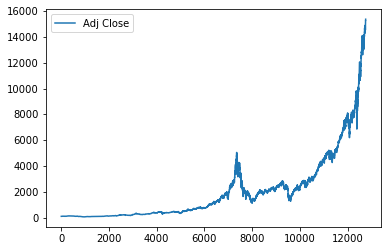

In [6]:
df.plot(y="Adj Close")

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


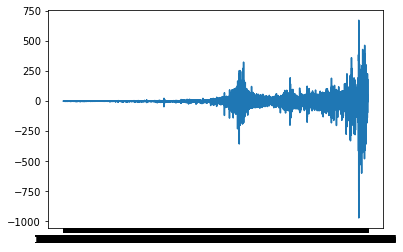

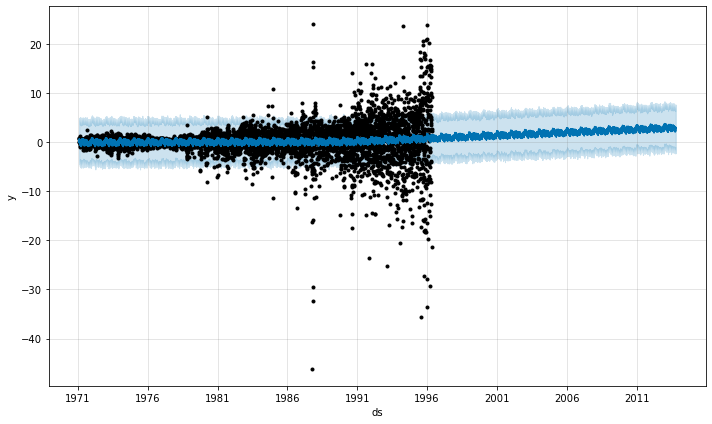

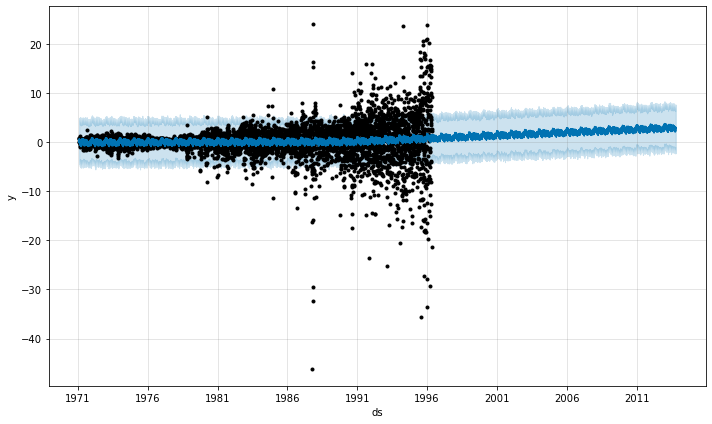

In [8]:
# yt = yt-y(t-1) 
df['Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
y = df['Close_shift']
df['Close_shift'].tail()
plt.plot(df['Date'],df['Close_shift'])
plt.show()
df_fbphophet = df.rename(columns={'Date':'ds', 'Close_shift':'y'})
df_fbphophet.head()
train_data_len = int(len(df)/2)
df_train = df_fbphophet[:train_data_len]
df_test = df_fbphophet[train_data_len:]
df_train.head(), df_train.shape
model = fbprophet.Prophet(daily_seasonality=True)
model.fit(df_train)
future_dates = model.make_future_dataframe(periods=len(df)-len(df_train))
prediction = model.predict(future_dates)
model.plot(prediction)

or take log

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


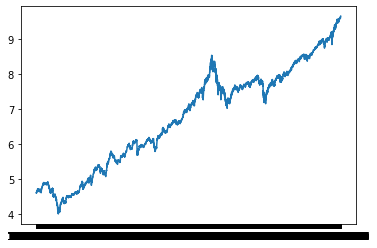

In [9]:
df['y'] = np.log(df['Adj Close'])
df['y'].tail()
plt.plot(df['Date'],df['y'])

In [10]:
test_index = df_test.set_index("ds")

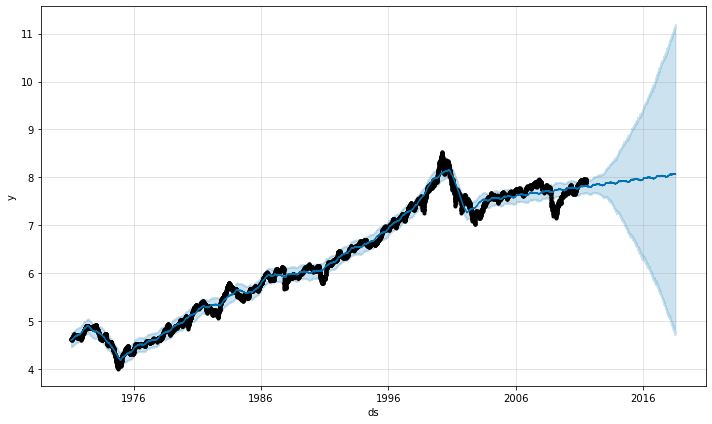

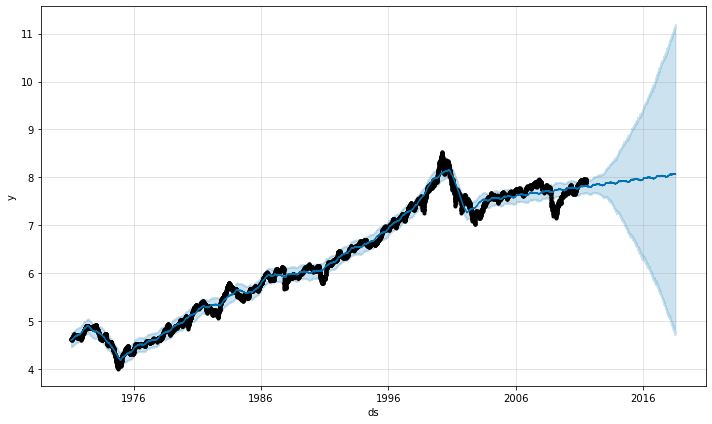

In [11]:
df_fbphophet = df.rename(columns={'Date':'ds', 'y':'y'})
df_fbphophet.head()
train_data_len = int(0.8*len(df))
df_train = df_fbphophet[:train_data_len]
df_test = df_fbphophet[train_data_len:]
df_train.head(), df_train.shape
model = fbprophet.Prophet(daily_seasonality=True)
model.fit(df_train)
future_dates = model.make_future_dataframe(periods=len(df)-len(df_train))
prediction = model.predict(future_dates)
model.plot(prediction)
#plt.plot(test_index['Adj Close'])

In [12]:
prediction_mse = prediction[train_data_len:]
test_mse = np.log(df['Adj Close'])
test_mse = test_mse[train_data_len:]
test_mse

10206    7.924836
10207    7.946802
10208    7.942444
10209    7.949596
10210    7.958168
           ...   
12753    9.633376
12754    9.632941
12755    9.636221
12756    9.637644
12757    9.639751
Name: Adj Close, Length: 2552, dtype: float64

In [13]:
mse = mean_squared_error(test_mse, prediction_mse['trend'])
rmse = mse ** 0.5
mse

0.6217650999121244

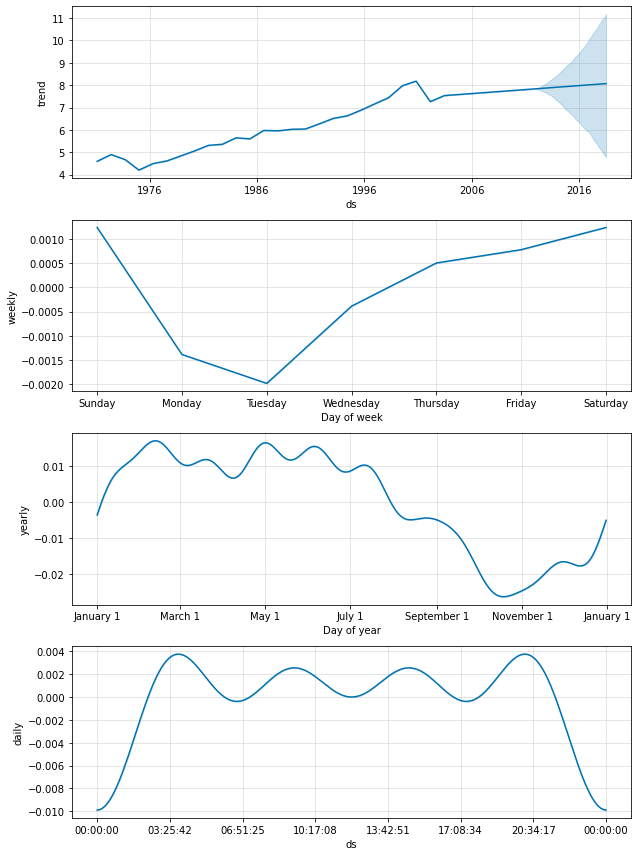

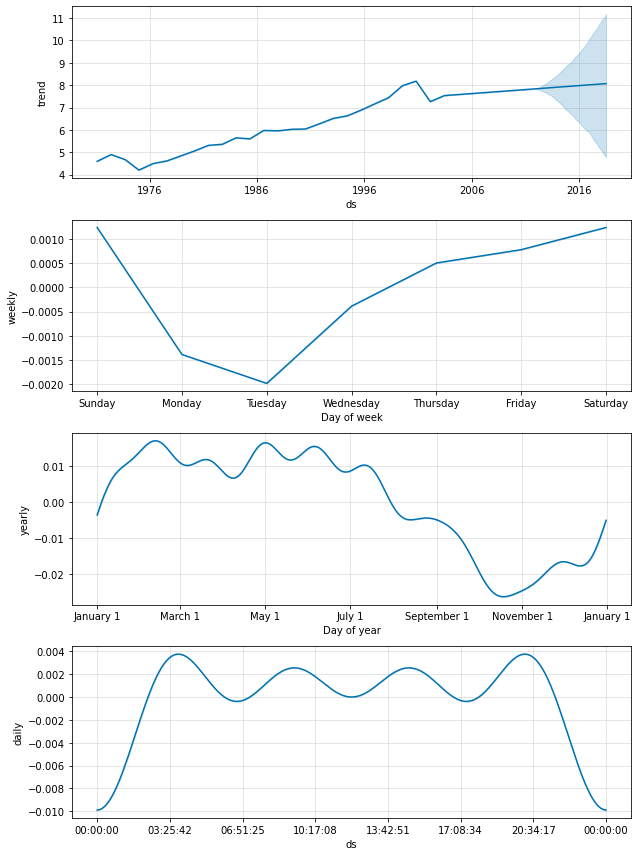

In [14]:
model.plot_components(prediction)

In [15]:
from fbprophet.diagnostics import cross_validation

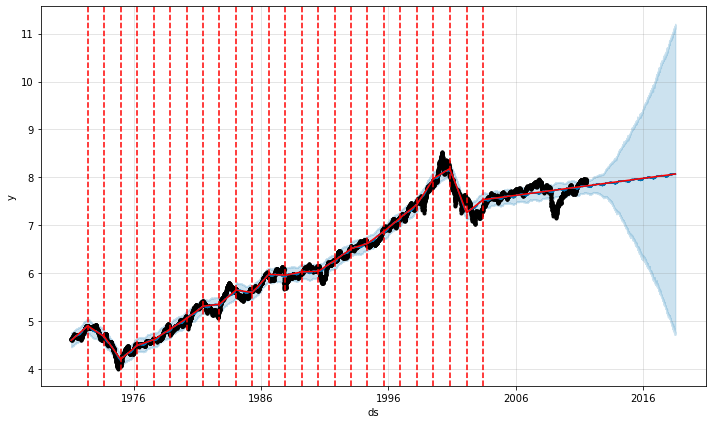

In [16]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)